Your name here.  
Your section number here.  

### Workshop 3: Plotting

**Submit this notebook to bCourses to receive a grade for this Workshop.**

Please complete workshop activities in code cells in this iPython notebook. The activities titled **Practice** are purely for you to explore Python, and no particular output is expected. Some of them have some code written, and you should try to modify it in different ways to understand how it works. Although no particular output is expected at submission time, it is _highly_ recommended that you read and work through the practice activities before or alongside the exercises. However, the activities titled **Exercise** have specific tasks and specific outputs expected. Include comments in your code when necessary. 

**The homework should be submitted on bCourses under the Assignments tab (both the .ipynb and .pdf files). Please label it by your student ID number (SIS ID)**

## Practice: Matplotlib Plotting Review

### Documentation and Resources

Matplotlib can do many, many things, and there is usually more than one way to do the same thing. Fortunately, it is also very well documented, and where the documentation is lacking, Google and [StackOverflow](https://stackoverflow.com/questions/tagged/matplotlib?sort=frequent&pageSize=15) often fill in nicely. If you haven't already, check out the [Matplotlib Gallery](http://matplotlib.org/gallery.html) and the
[tutorials](https://matplotlib.org/stable/tutorials/index.html) to get an idea of the resources available to you. You might also want to check out [this basic tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html), [this more varied tutorial](https://scipy-lectures.org/intro/matplotlib/), and [these examples](https://matplotlib.org/stable/plot_types/index.html).

### State-Machine vs Object-Oriented

Matplotlib can be used in two different ways: the state-machine approach, or the object-oriented approach. Most things can be done in either way, but some things are more difficult or impossible using a particular approach. Also, sometimes one way will lead to more understandable code than the other. It's good to be able to use both.

Here's a couple examples to remind you how these work, adapted from the [multiple_figs_demo](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/multiple_figs_demo.html) in the matplotlib gallery. These examples create exactly the same plots.

In [ ]:
# STATE-MACHINE approach
# Working with multiple figure windows and subplots
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)

plt.figure(1)
plt.subplot(211)    # 2 Rows, 1 Column; Plot #1
plt.plot(t, s1)
plt.subplot(212)    # 2 Rows, 1 Column; Plot #2
plt.plot(t, 2*s1)

plt.figure(2)

plt.plot(t, s2)

# now switch back to figure 1 and make some changes to the first subplot
plt.figure(1)
plt.subplot(211)    # 2 Rows, 1 Column; Plot #1. You may receive a :"deprecation" warning from Python 3.8
plt.plot(t, s2, 'gs')

plt.show()

In [ ]:
# OBJECT-ORIENTED approach
# Working with multiple figure windows and subplots
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)

fig1 = plt.figure()
fig2 = plt.figure()

ax1_1 = fig1.add_subplot(211)  # 2 Rows, 1 Column; Plot #1
ax1_2 = fig1.add_subplot(212)  # 2 Rows, 1 Column; Plot #2

ax2   = fig2.add_subplot(111)  # 1 Row,  1 Column; Plot #1

ax1_1.plot(t, s1)
ax1_2.plot(t, 2*s1)
ax2.plot(t, s2)

# now make some changes to the first subplot in figure 1
ax1_1.plot(t, s2, 'gs')

plt.show()

In the state-machine approach, we change which figure or subplot is active, and then tell matplotlib to do things with the currently active figure/subplot. In the object-oriented approach, we assign variables to each of the figures and subplots, and then have matplotlib do things on whichever one we want. The various `ax1_1`, `ax1_2`, and `ax2` in this example contain "axes objects" that we can plot on and work with.

Notice that we have a lot of flexibility in the *object-oriented* approach to reorganize the code in whatever way seems most readable. In the state-machine approach, you can also move your code around, but you may have to add new `figure` or `subplot` lines to make sure that the correct figure/subplot is currently active for what you want to do. Play around with the code above, or write some of your own, to see how things change!

Here's another way to do the object-oriented approach, using `plt.subplots` instead of `figure` and `add_subplot` to make it a bit more compact. Again, this does the exact same thing.

In [ ]:
# OBJECT-ORIENTED approach, version 2
# Working with multiple figure windows and subplots
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)

fig1, (ax1, ax2) = plt.subplots(2,1)  # 2 Rows, 1 Column
ax1.plot(t, s1)
ax2.plot(t, 2*s1)

fig2, ax3 = plt.subplots(1,1)         # 1 Row,  1 Column
ax3.plot(t, s2)

# now make some changes to the first subplot in figure 1
ax1.plot(t, s2, 'gs')

plt.show()

In these examples, you'll notice that the `plot` command is the same in both approaches.\* Some commands, however, are slightly different. For instance setting $x$ or $y$ labels ...

--------
\* *Technically, `plot` is used as a "function" in the state-machine approach, but as a "method" in the object-oriented approach. You don't need to worry about the technical differences between these for now.*

In [ ]:
# STATE-MACHINE approach
%matplotlib inline
plt.plot(range(10))
plt.title('TITLE')
plt.xlabel('X LABEL')
plt.ylabel('Y LABEL')

In [ ]:
# OBJECT-ORIENTED approach
%matplotlib inline
fig, ax = plt.subplots(1,1)
ax.plot(range(10))
ax.set_title('TITLE')
ax.set_xlabel('X LABEL')
ax.set_ylabel('Y LABEL')

For simple plots like these, you can see how the state-machine approach gives somewhat cleaner code.

### Exercise 1: Kinematics Plot

[Adapted from Ayars, Problem 0-5] Create a single figure that shows separate graphs of vertical position, velocity, and acceleration for an object in free-fall, as in the sample plot below. Your plot should have a single horizontal time axis and separate stacked graphs showing position, velocity, and acceleration each on their own vertical axis. The online [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) will probably be helpful! Make each curve a different color. (The example below uses magenta, cyan, and yellow.)

#### Hints

Look for "subplots_demo" or "shared_axis_demo" in the gallery.

Remember you can include a format string like `'b-'` in a plot command to get a blue line, etc.

You can get the superscript 2 in the last $y$-label by typing `$^2$` in the label string.

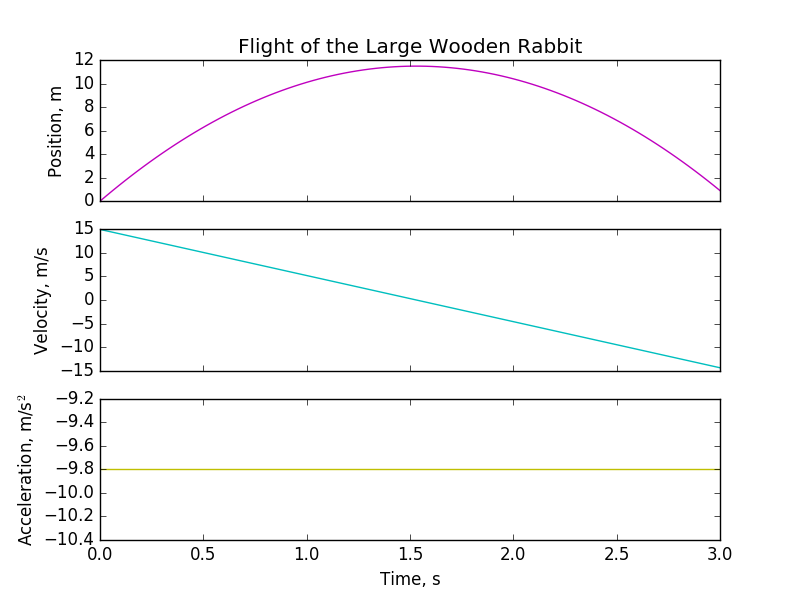

In [6]:
# Don't rerun this snippet of code.
# If you accidentally do, close and reopen the notebook (without saving)
# to get the image back. If all else fails, redownload the notebook.

from IPython.display import Image
Image(filename="kinematics_plot.png")

## Practice: More Plotting Commands

Matplotlib has many plotting functions besides `plot`. Here's a quick sampler platter:

In [2]:
# make sure our libraries are imported, and plot inline
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Semilog
x = np.linspace(1e-1,100,1000)
plt.semilogy(x, x**2)

In [ ]:
# Error Bars -- http://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
yerr = 0.05 + 0.1*np.sqrt(x)
xerr = 0.05 + yerr

plt.errorbar(x, y, xerr=xerr, yerr=yerr)

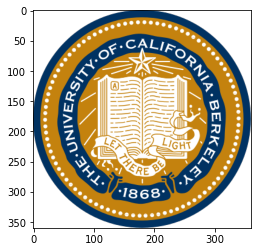

In [3]:
# Displaying images -- https://matplotlib.org/stable/tutorials/introductory/images.html
# New interface for Python 3 and MPL > 3.4

from urllib.request import urlopen
from PIL import Image

url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Seal_of_University_of_California%2C_Berkeley.svg/360px-Seal_of_University_of_California%2C_Berkeley.svg.png'
img = Image.open(urlopen(url))
plt.imshow(img)

In [ ]:
# imshow can plot any 2D array ... you saw this earlier with meshgrid
#   if you have a file with a 2D array of numbers, use
#   array_2D = np.loadtxt(your_file.txt)
array_2D = np.random.rand(100,100)
plt.imshow(array_2D)  # show the new 2D array
plt.set_cmap('hot') # set colormap
plt.colorbar()

In [ ]:
# Scatter plot -- https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_demo2.html
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.viridis()    # set colormap
plt.colorbar()   # add a colorbar

In [ ]:
# Polar Plot (with polar axes) -- https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html
#   Note: there's a bug with polar axes in matplotlib, where they
#   cannot display negative r values.
theta = np.linspace(0, 10 * np.pi, 1000)
r = [th**2 for th in theta]
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_title("Galilean Spiral", va='bottom')

In [ ]:
# Contour Plot -- https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x,y)
Z = np.exp(-(2*X**2 + Y**2/2))

ax = plt.subplot(111)
levels = np.arange(0,1.0,.03)
con = ax.contour(X, Y, Z, levels)
ax.set_aspect('equal')
plt.colorbar(con)

In [ ]:
# You can plot contour and imshow together ...
plt.inferno() # set the colormap
plt.contour(X, Y, Z)
plt.imshow(Z, extent=[-1,1,-1,1])
plt.colorbar()

### Colormaps

This was mentioned earlier in an exercise the workshop, but matplotlib has many colormaps that you can try.  See [this doc](https://matplotlib.org/stable/tutorials/colors/colormaps.html) or type `help(plt.colormaps)` for detailed instructions on colormaps and a visual list of all colormaps. You can use any of them by inserting a `set_cmap` command after your `imshow`, `scatter`, or any plotting function that can use a colormap. For instance, `plt.set_cmap('jet')`. some colormaps, such as `jet`, `hot`, `gray`, and `viridis` (among others), have special commands to use them: you can type `plt.gray()` instead of `plt.set_cmap('gray')`.

The current default colormap for matplotlib is `jet`, but this will be changing to `viridis` in the next version, because `viridis` is designed to be perceptually uniform, whereas `jet` is not.

### Aside: What is `pylab`?

As you look at online documentation, or even some of the course textbooks for Physics 77, you'll notice pylab come up on occasion. What is it, and how does it differ from what we've been using? Here's a brief description from a StackOverflow answer:

> 1. [...] pylab is part of matplotlib (in matplotlib.pylab) and tries to give you a MatLab like environment. matplotlib has a number of dependencies, among them numpy which it imports under the common alias np. scipy is not a dependency of matplotlib.

> 2. If you run ipython --pylab an automatic import will put all symbols from matplotlib.pylab into global scope. Like you wrote numpy gets imported under the np alias. Symbols from matplotlib are available under the mpl alias.

from https://stackoverflow.com/questions/12987624/confusion-between-numpy-scipy-matplotlib-and-pylab

Note that using pylab is not officially recommended. Better practice is to use

    import matplotlib.pyplot as plt
    import numpy as np
    
just as we've been doing.

## Exercises: Plotting with Colormaps and Different Scales

### Exercise 2

Create a plot of $x^2 sin(1/x^2)+x$ on the interval $[−1,1]$ using points spaced 0.1 apart. Use numpy's `arange` function (not `linspace`). Then adjust your code so the plotting points are 0.01 apart, and finally 0.001 apart. Notice how the curve changes. Have your code print a brief description of the visual difference between these plots. Submit the version with 0.001 spacing.

You don't need to label this plot.

### Exercise 3

Create a 2D plot of $sin(1/x^2) + y$ where $x$ and $y$ both range from -1 to 1. (Tip: You don't need more than 1000 points in the $x$ dimension, and you can get away with even fewer points in the $y$ dimension.) Be careful to check that the point $(x,y) = (-1, -1)$ is in the bottom left of the plot, where it should be.

You don't need to label this plot, but be sure to include a colorbar and make sure the axes properly show that the plot is from -1 to 1 in both dimensions.

You can use the colormap of your choice. If you want to experiment with different colormaps, see [this page](https://matplotlib.org/stable/gallery/color/colormap_reference.html) for a visual list of colormaps. You can use any of them by inserting a `set_cmap` command after your `imshow`. For instance, `plt.set_cmap('jet')`. See [this doc](http://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps) or type `help(plt.colormaps)` for more detailed instructions on colormaps.

You code doesn't need to print anything for this exercise, but it should show your plot.

### Exercise 4 

Create a semilogy plot of the relative difference of  $1/(1+x^2)$  and  $1/x^2$  on the interval $[5,25]$. (The relative difference of numbers $a$ and $b$ is given by $|1−a/b|$. It provides a better sense of error relative to the order of magnitudes of $a$ and $b$.)

### Exercise 5 

Copy and paste the following numbers into a text file `mystery.txt` in your current directory (Run `%pwd` to see what directory you're in. It will probably be the same directory as this notebook).

    2 2 0 0 0 0 2 2
    2 0 5 5 5 5 0 2
    0 5 0 5 0 5 5 0
    0 5 0 5 0 5 5 0
    0 5 5 5 5 0 5 0
    0 5 0 0 0 5 5 0
    2 0 5 5 5 5 0 2
    2 2 0 0 0 0 2 2

Now write a program which loads the text file into a 2D array with `np.loadtxt` and displays it with `imshow`. Use the colormap `gnuplot` and add the argument `interpolation='none'` to your `imshow` so that it displays clear pixels rather than interpolating between them.

In [ ]:
%pwd

## Congratulations!

You've finished Workshop 3!